In [25]:
import sys
import os
sys.path.append(os.path.abspath("../n70_agents_projects"))

In [26]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
OPENAI_MODEL = os.getenv("OPENAI_MODEL")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [27]:
from langchain_tavily import TavilySearch

web_search = TavilySearch(max_results=3)
results = web_search.run("소버린 AI란 무엇인가요?")

print(results["results"][0]["content"])

'자주적인', '주권이 있는' 이라는 의미의 소버린(Sovereign)에 AI(인공지능)을 붙인 단어로, 일반적으로, 특정 국가 또는 조직이 자국 내에서 독립적으로 운영하고 통제할 수 있는 인공지능 시스템을 의미한다. AI 모델이 외부 클라우드나 서비스에 의존하지 않고 자국 내에서 운영되어, 보안 및 독립성 강화에 초점을 맞추는 것을 의미한다. 기존의 AI 서비스는 외부 클라우드 서버에서 운영되는 반면, 소버린 AI는 특정 국가나 기업이 자체 인프라에서 AI를 운영하여 데이터 유출 및 의존성을 최소화, 외부 유출 위험이 줄어든다는 장점이 있다. OpenAI, Google, DeepSeek 등 외부 기업의 기술에 의존하지 않고 국가 안보 및 정보 보호 측면에서 유리 경제 및 기술 자립을 추구하며, 자국 내 AI 생태계를 조성하여 국가 차원의 기술 경쟁력을 강화시킬 수 있다. 중국은 자국 내 AI 발전을 위해 OpenAI, Google 등의 서비스를 차단하고 자체 AI 모델(바이두 Ernie Bot(어니봇), Alibaba의 Tongyi Qianwen)을 개발중에 있다.


In [28]:
from langgraph.prebuilt import create_react_agent

research_agent = create_react_agent(
    model="openai:gpt-4o-mini",
    tools=[web_search],
    prompt=(
        "당신은 리서치 전잠 에이전트입니다."
        "지시사항:\n"
        "1. 리서치 관련 업무만 지원합니다. 수학 계산은 절대 하지 마세요.\n"
        "2. 작업이 완료되면, 수퍼바이저 에이전트에게 직접 보고합니다.\n"
        "3. 작업 결과만 응답하고, 그 외의 텍스트는 절대 포함하지 마세요.\n"
    ),
    name="research_agent"
)

In [29]:
from langchain_core.messages import convert_to_messages

def pretty_print_message(message, indent=False):
    # 메시지를 HTML 형식으로 변환
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    # indent 매개변수가 True이면 각 줄 앞에 탭 문자를 추가하여 들여쓰기를 함
    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    # update가 튜플인 경우 서브그래프에서 온 업데이트인지 확인하고 해당 정보를 출력
    if isinstance(update, tuple):
        # ns는 업데이트가 발생한 노드가 속한 서브그래프의 경로를 담고 있슴
        # ns는 그래프 실행 중 업데이트가 발생한 위치(서브그래프의 경로)를 나타내는 정보
        ns, update = update
        # 최상위 그래프(부모 그래프)에서 온 업데이트는 건너뛰고, 서브그래프에서 온 업데이트만 처리
        if len(ns) == 0:
            return

        # ns의 마지막 요소에서 그래프 ID를 추출하여 어떤 서브그래프에서 업데이트가 왔는지 식별하는 데 사용
        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    # update 딕셔너리의 각 항목(노드 이름과 업데이트 내용)을 반복
    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        # 각 노드 업데이트에 대한 레이블을 출력
        print(update_label)
        print("\n")

        # 메시지 목록을 가져옴
        messages = convert_to_messages(node_update["messages"])

        # last_message 매개변수가 True이면 마지막 메시지만 가져옴
        if last_message:
            messages = messages[-1:]

        # 가져온 메시지 목록을 pretty_print_message 함수를 사용하여 출력
        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")  # 각 업데이트 및 메시지 출력 후 빈 줄을 출력하여 가독성을 높임

In [30]:
for chunk in research_agent.stream({
        "messages": [
            {
                "role": "user",
                "content": "2024년도 MLB 월드시리즈 우승팀"
            }
        ]
    }):

    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: research_agent
Tool Calls:
  tavily_search (call_IOqLVVkshTrTkFqt6SreBzPc)
 Call ID: call_IOqLVVkshTrTkFqt6SreBzPc
  Args:
    query: 2024 MLB World Series champion
    search_depth: advanced


Update from node tools:


================================= Tool Message =================================
Name: tavily_search

{"query": "2024 MLB World Series champion", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://en.wikipedia.org/wiki/2024_World_Series", "title": "2024 World Series - Wikipedia", "content": "The 2024 World Series was the championship series of Major League Baseball's (MLB) 2024 season. The 120th edition of the World Series, it was a best-of-seven playoff between the National League \"National League (baseball)\") (NL) champion Los Angeles Dodgers and the American League (AL) champion New York Yankees. It was the Dodgers' f

In [33]:
from langchain.tools import tool

@tool
def add(first: float, second: float) -> float:
    """
    Adds two numbers together.
    
    Args:
        first (float): The first number to add.
        second (float): The second number to add.
    
    Returns:
        float: The sum of the two numbers.
    """
    return first + second

@tool
def subtract(first: float, second: float) -> float:
    """
    Subtracts the second number from the first.
    
    Args:
        first (float): The number to subtract from.
        second (float): The number to subtract.
    
    Returns:
        float: The result of the subtraction.
    """
    return first - second   

@tool
def multiply(first: float, second: float) -> float:
    """
    Multiplies two numbers together.
    
    Args:
        first (float): The first number to multiply.
        second (float): The second number to multiply.
    
    Returns:
        float: The product of the two numbers.
    """
    return first * second

@tool
def divide(first: float, second: float) -> float:
    """
    Divides the first number by the second.
    
    Args:
        first (float): The dividend.
        second (float): The divisor.
    
    Returns:
        float: The result of the division.
    """
    if second == 0:
        raise ValueError("Cannot divide by zero.")
    return first / second

from langgraph.prebuilt import create_react_agent
math_agent = create_react_agent(
    model="openai:gpt-4o-mini",
    tools=[add, subtract, multiply, divide],
    prompt=(
        "당신은 수학 계산 에이전트입니다.\n"
        "지시사항:\n"
        "1. 수학 계산 관련 업무만 지원합니다.\n"
        "2. 작업이 완료되면, 수퍼바이저 에이전트에게 직접 보고합니다.\n"
        "3. 작업 결과만 응답하고, 그 외의 텍스트는 절대 포함하지 마세요.\n"
    ),
    name="math_agent"
)


In [35]:
for chunk in math_agent.stream({
        "messages": [
            {
                "role": "user",
                # "content": "2 + 3"
                "content": "(221.5 / 3.2) * 2 + 4.5 - 1"
            }
        ]
    }):

    pretty_print_messages(chunk, last_message=True)

Update from node agent:


================================== Ai Message ==================================
Name: math_agent
Tool Calls:
  divide (call_6W0iCyRxjJqaMg6jeZwkUbAn)
 Call ID: call_6W0iCyRxjJqaMg6jeZwkUbAn
  Args:
    first: 221.5
    second: 3.2
  add (call_NyCksccsc4Izxb1VYOHQ1dfd)
 Call ID: call_NyCksccsc4Izxb1VYOHQ1dfd
  Args:
    first: 4.5, second: -1}},{: 5
    id: 5
    name: functions.multiply
    parameters: {'first': 5, 'second': 2}


Update from node tools:


================================= Tool Message =================================
Name: divide

69.21875


Update from node tools:


================================= Tool Message =================================
Name: add

Error: 2 validation errors for add
first
  Field required [type=missing, input_value={'first: 4.5, second: -1}...first': 5, 'second': 2}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
second
  Field required [type=missing, input_value={'fir

In [ ]:
# %pip install langgraph-supervisor

In [44]:
from langgraph_supervisor import create_supervisor
from langchain.chat_models import init_chat_model

supervisor_graph = create_supervisor(
    model=init_chat_model("openai:gpt-4o-mini"),
    agents=[math_agent, research_agent],
    prompt=(
        "당신은 수퍼바이저 에이전트입니다.\n"
        "지시사항:\n"
        # "1. 리서치 및 수학 계산 관련 업무를 지원합니다.\n"
        # "2. 작업이 완료되면, 결과를 사용자에게 직접 보고합니다.\n"
        # "3. 작업 결과만 응답하고, 그 외의 텍스트는 절대 포함하지 마세요.\n"
        "- research_agent: 리서치 관련 업무를 지원합니다.\n"
        "- math_agent: 수학 계산 관련 업무를 지원합니다.\n"
        "- 작업은 리서치와 수학 계산으로 나뉘며, 각 에이전트는 해당 업무에만 집중합니다.\n"
        "- 여러 에이전트가 동시에 작업을 수행할 수 있으며, 각 에이전트는 독립적으로 작업을 처리합니다.\n"
        "- 작업 할당하는 것 이외엔 직접 작업 수행하지 않습니다.\n"
    ),
    add_handoff_messages=True,  # 에이전트 작업 완료 후 수퍼바이저에게 직접 보고하도록 설정
    output_mode='full_history',  # 전체 대화 기록을 출력하도록 설정
).compile()

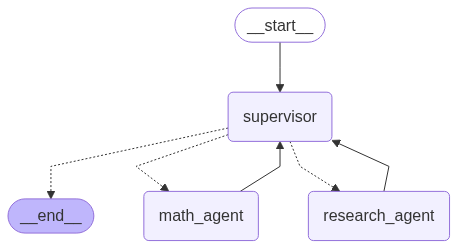

In [45]:
from IPython.display import Image, display

display(Image(supervisor_graph.get_graph().draw_mermaid_png()))

In [ ]:
for chunk in supervisor_graph.stream({
        "messages": [
            {
                "role": "user",
                # "content": "2020년부터 현재까지 대한민국 AI 관련 예산을 찾아 각 년도별 예산과 총합을 표로 작성"
                "content": "2000년부터 2024년 현재까지 대한민국 AI 관련 예산을 찾아 각 년도별 예산과 총합을 표로 작성"
            }
        ]
    }):
    pretty_print_messages(chunk)

Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


Update from node supervisor:


================================ Human Message =================================

2000년부터 2024년 현재까지 대한민국 AI 관련 예산을 찾아 각 년도별 예산과 총합을 표로 작성
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_agent (call_XWcNnH5Yb1NxxcdBu68dK0Mz)
 Call ID: call_XWcNnH5Yb1NxxcdBu68dK0Mz
  Args:
================================= Tool Message =================================
Name: transfer_to_research_agent

Successfully transferred to research_agent


Update from node research_agent:


================================ Human Message =================================

2000년부터 2024년 현재까지 대한민국 AI 관련 예산을 찾아 각 년도별 예산과 총합을 표로 작성
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_agent (call_XWcNnH5Yb1NxxcdBu68dK0Mz)
 Call ID: call_XWcNnH5Yb1NxxcdBu68dK0Mz
  Args:
================================= Tool Message ===========